![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif) 

# Ex1 Implementing Linear Regression

In this first exercise we will be implementing a linear regression algorithm. For this exercise we have a set of ten points $(X_1,y_1) \cdots (X_{10},y_{10})$.  

In [1]:
# Importing the libraries and functions we will need for this exercise
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>


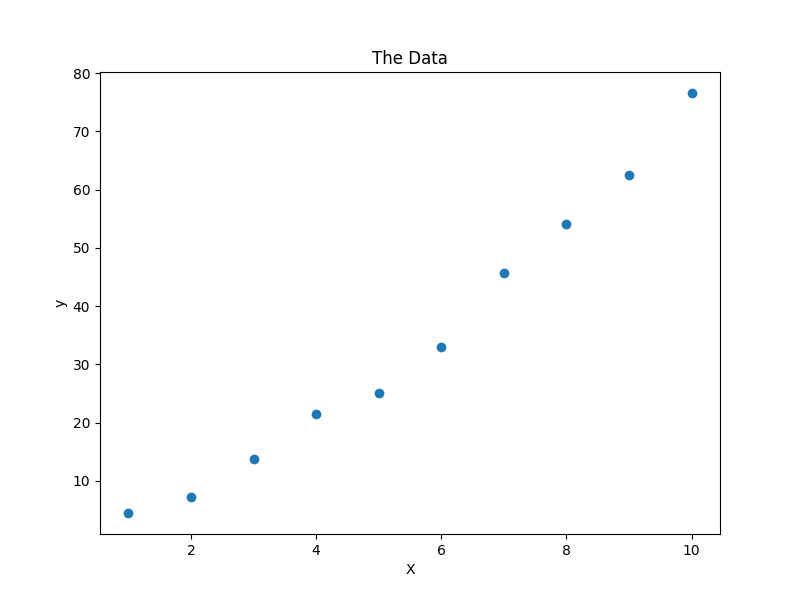

In [2]:
# The data
np.random.seed(42)
X = np.arange(1, 11).reshape(10, 1)
y = 0.5*X**2+ 2.5*X+0.5+2*np.random.randn(10,1)

ylim = [0,80]
%matplotlib notebook
fig_size = (8.,6.)
plt.figure(figsize=fig_size)
plt.scatter(X, y)
plt.title('The Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

**Reminder :** the goal in a regression task is to learn the mapping from the features (explanatory variables or input) to the response variable (or output). In our case we want to learn some function $f$ to make our predictions: 

$$y^{pred}:=f(X)$$ 

such that these predictions are close to the observed points $y$.

In linear regression we assume that the mapping between the features and the response variables is linear thus we can define our function $f$ as follows: 
$$f(X):=w_1 X + w_0$$
where $w_1$ and $w_0$ are two parameters.

The goal is then to optimize these parameters so that our predictions fit the data that we have. The standard approach to do so is to define a loss function that determines the quality of our model and to use an optimization algorithm to find the parameters that minimize this loss function. The standard loss for a regression task is the mean squared error (MSE), so the problem we are trying to solve is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}} \frac{1}{n}\sum_{i=1}^{n}(y_i^{pred}-y_i)^2$$

**Task 1:** To solve this optimization problem we will implement a gradient descent algorithm. Fill in the missing steps in the code.

**Hint:** For the derivative just make sure you replace $y_i^{pred}$ by its definition in the loss function. 

<IPython.core.display.Javascript object>


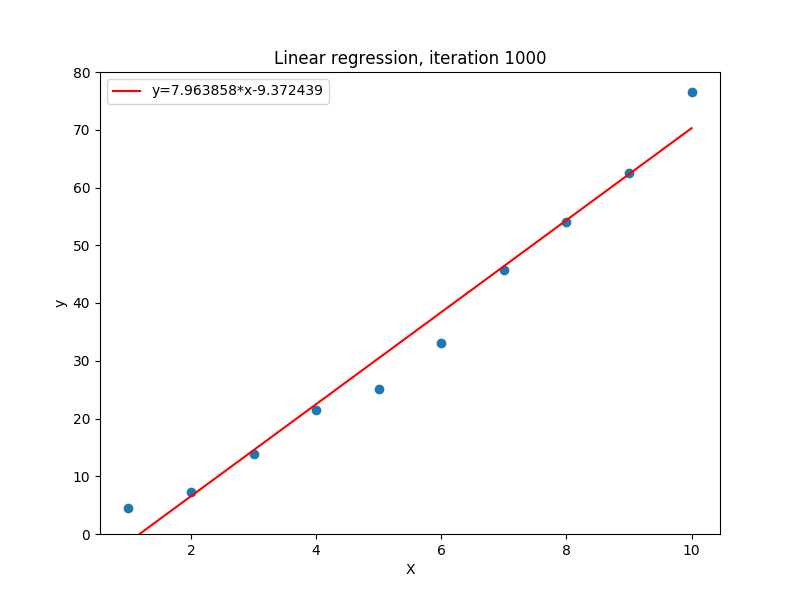

In [3]:
# Preparing visualization of the results
%matplotlib notebook
fig_size = (8.,6.)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
ax.set_ylim(ylim)
plt.ion()
plt.show()
fig.canvas.draw()

# Defining the model parameters.
w1 = 0.
w0 = 0.

L = 0.01  # The learning Rate
num_iter = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Main loop for the gradient descent algorithm
for i in range(num_iter): 
    y_pred = w1*X + w0  # The current predicted value of Y
    
    D_w1 = (2/n) * np.sum(X * (y_pred-y))  # Derivative of the loss wrt w1
    D_w0 = (2/n) * np.sum(y_pred-y)  # Derivative of the loss wrt w0
    w1 = w1 - L * D_w1  # Update of w1
    w0 = w0 - L * D_w0  # Update of w0
    
    # Visualizing the results
    if (i+1) % 10 == 0:
        ax.clear()
        plt.xlabel('X')
        plt.ylabel('y')
        ax.scatter(X, y) 
        ax.set_ylim(ylim)
        if w0 <0:
            lab = 'y={:4f}*x{:4f}'.format(w1,w0)
        else:
            lab = 'y={:4f}*x+{:4f}'.format(w1,w0)
        ax.plot([np.min(X), np.max(X)], [np.min(y_pred), np.max(y_pred)], color='red',label=lab)  # regression line
        ax.set_title('Linear regression, iteration {}'.format(i+1))
        ax.legend(loc=2)
        fig.canvas.draw()

For the rest of the exercise we will [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)'s linear regression model, so you can carry on even if you have not finished the previous part.

<IPython.core.display.Javascript object>


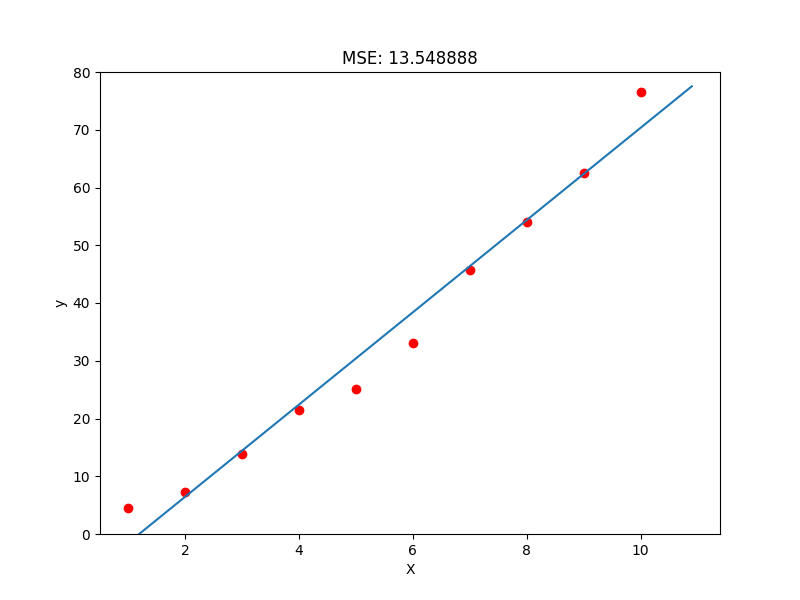

In [4]:
# Using sklearn's linear regression model.
model = LinearRegression()
model.fit(X, y)
x = np.arange(1, 11, 0.1).reshape(-1, 1)
pred = model.predict(x)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro', x, pred)
axes = plt.gca()
axes.set_ylim(ylim)
axes.set_title("MSE: {:4f}".format(mean_squared_error(y,model.predict(X))))
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Now let's try to improve the accuracy of our model.

The most basic way to do so is often just to add additional features (explanatory variables). Let's try for example to add the squares of the features. This means we are making the assumption that the mapping between the data $X$ and the  response variables $y$ is polynomial of degree $2$, thus we are now fitting a function $f_2$ defined as follows: 
$$f_2(X):=w_2 {X}^2+w_1 X + w_0$$

**Task 2:** Create a $10\times2$ matrix X2 where the first column is the original $X$ data and the second column is $X^2$.  

In [5]:
X2 = X
X2 = np.c_[X,X**2]

<IPython.core.display.Javascript object>


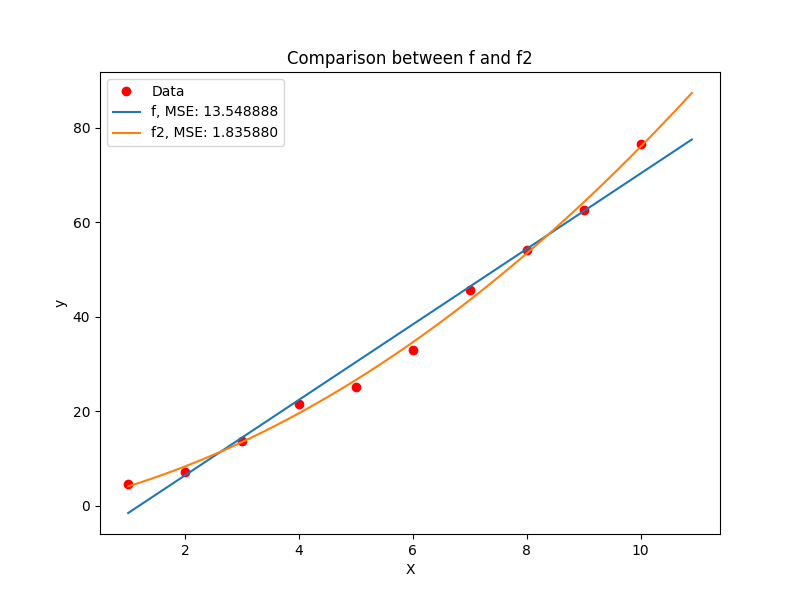

In [6]:
model.fit(X, y)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro',label='Data')
plt.plot(x, pred,label='f, MSE: {:4f}'.format(mean_squared_error(y,model.predict(X))))
model.fit(X2, y)
x2 = np.arange(1, 11, 0.1)
x2 = np.c_[x2, x2**2]
pred2 = model.predict(x2)
plt.plot(x2[:, 0], pred2,label='f2, MSE: {:4f}'.format(mean_squared_error(y,model.predict(X2))))
plt.legend()
plt.title("Comparison between f and f2")
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let's see what happens if you take this reasoning even further. 

**Task 3:** In the following code try to increase $N$ the degree of the features that you are adding and find out how much you can improve the the fit of the model. What do you notice?

<IPython.core.display.Javascript object>


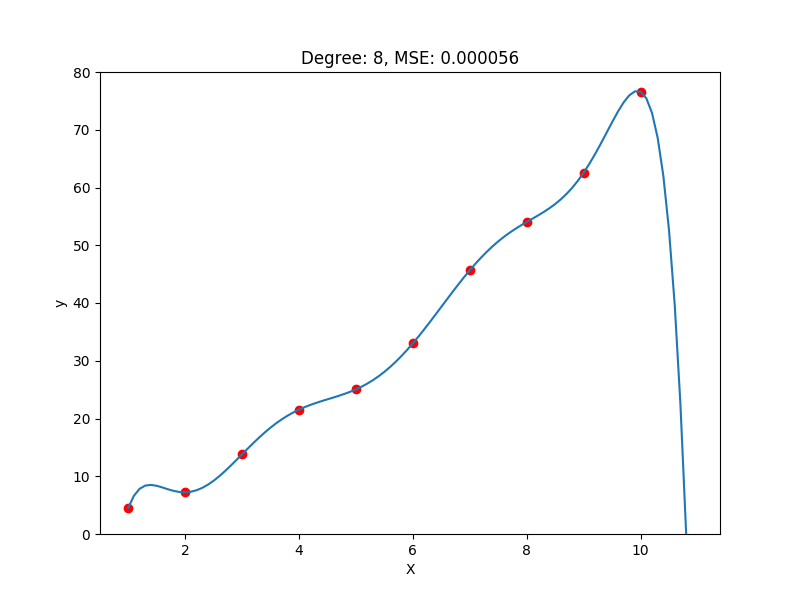

In [7]:
N = 8
XN = X
xN = np.arange(1, 11, 0.1)
for i in range(1,N):
    XN = np.c_[XN,X**(i+1)]
    xN = np.c_[xN,np.arange(1, 11, 0.1)**(i+1)]
model.fit(XN, y)
predN = model.predict(xN)
plt.figure(figsize=fig_size)
plt.plot(XN[:, 0], y, 'ro', xN[:, 0], predN)
plt.title("Degree: {}, MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN))))
plt.ylim(ylim)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Let's say that we chose $N=8$ as the MSE is pretty low. Suppose that we are sampling some new points from the same original distribution how well does our model fits to the new data?

<IPython.core.display.Javascript object>


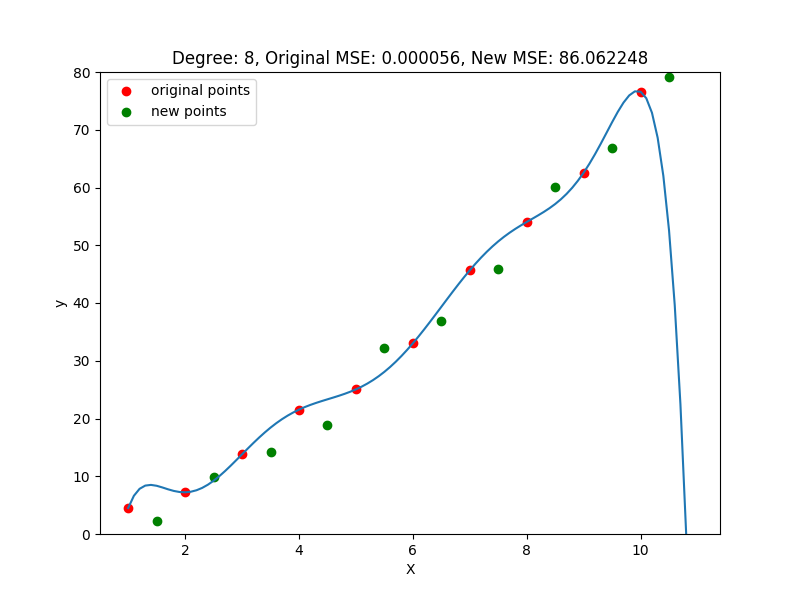

In [8]:
N = 8
np.random.seed(50)
X_val = X + 0.5
XN_val = X_val
for i in range(1,N):
    XN_val = np.c_[XN_val,X_val**(i+1)]
y_val =0.5*X_val**2+ 2.5*X_val+0.5+2*np.random.randn(10,1)
plt.figure(figsize=fig_size)
plt.plot(X, y, 'ro',label='original points')
plt.plot(XN_val[:,0],y_val,'go',label='new points')
plt.legend()
plt.title("Degree: {}, Original MSE: {:4f}, New MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN)),mean_squared_error(y_val,model.predict(XN_val))))
plt.plot(xN[:, 0], predN)
plt.ylim(ylim)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

This is one of the most important messages of this exercise. If you make the model complicated enough it will be able to fit your data perfectly but you have to make sure that you are using a validation scheme for your model! Splitting the data into training, validation and test sets or cross-validation are both valid schemes to evaluate how well your model generalizes to unseen data.

Let's make sure we are not overfitting to our training data, to do so we will use our new set of points as the validation set. For the purpose of this exercise we will not be using a test set.

**Reminder:** The training and validation sets are used during training, the test set is used only after you're done with training to evaluate your model on unseen data. The training set is used for fitting the parameters. Whereas the validation set is used to tune "hyperparameters" such as the complexity of the model we are choosing ($N$ in our case).

One way of preveting overfitting in our model is to choose the model complexity appropriately for the type of data that we have.

**Task 4:** Run the following code and decide on what you think is the optimal choice for $N$.

<IPython.core.display.Javascript object>


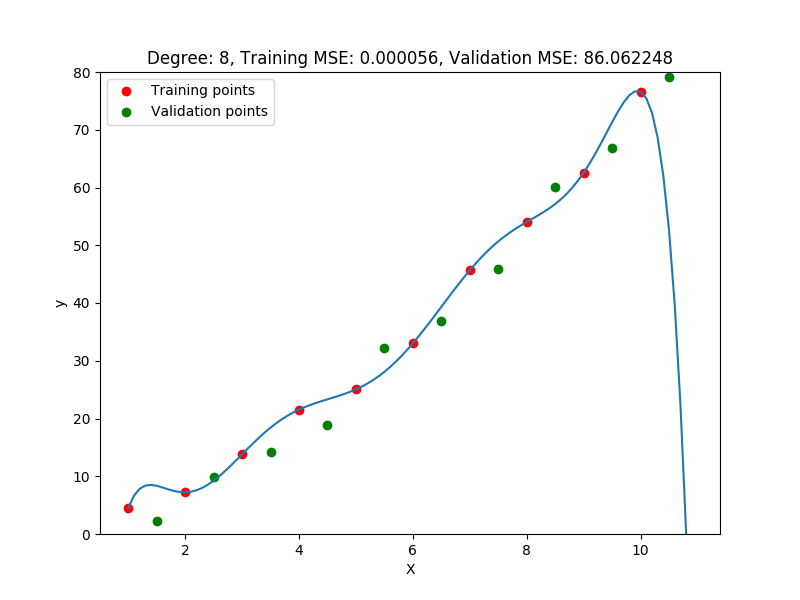

<IPython.core.display.Javascript object>


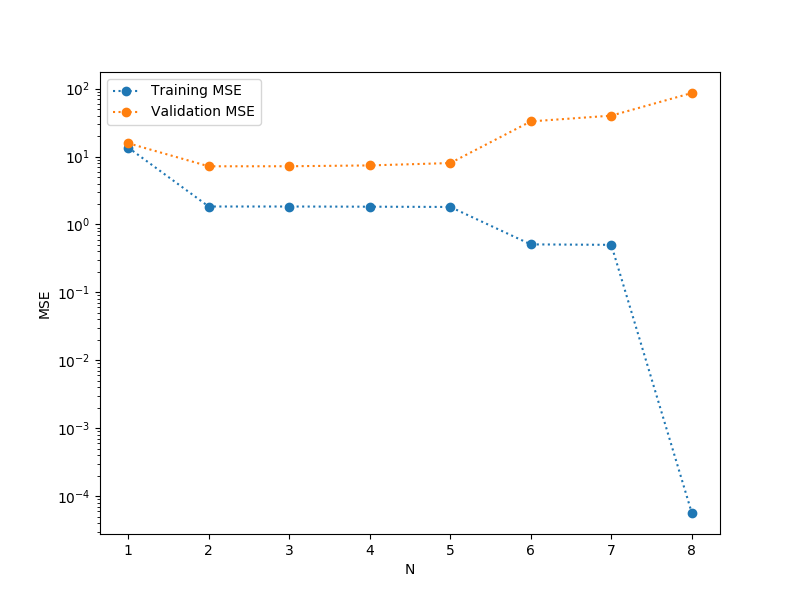

In [9]:
Ns = range(1,9)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
plt.ion()
plt.show()
fig.canvas.draw()
train_mses=[]
val_mses=[]
for N in Ns:
    ax.clear()
    X_val = X + 0.5
    XN_val = X_val
    XN = X
    xN = np.arange(1, 11, 0.1).reshape(100,1)
    for i in range(1,N):
        XN = np.c_[XN,X**(i+1)]
        xN = np.c_[xN,np.arange(1, 11, 0.1)**(i+1)]
        XN_val = np.c_[XN_val,X_val**(i+1)]
        
    model.fit(XN, y)
    predN = model.predict(xN)
    ax.plot(X, y, 'ro',label='Training points')
    ax.plot(XN_val[:,0],y_val,'go',label='Validation points')
    plt.legend()
    plt.title("Degree: {}, Training MSE: {:4f}, Validation MSE: {:4f}".format(N,mean_squared_error(y,model.predict(XN)),mean_squared_error(y_val,model.predict(XN_val))))
    train_mses.append(mean_squared_error(y,model.predict(XN)))
    val_mses.append(mean_squared_error(y_val,model.predict(XN_val)))
    ax.plot(xN[:, 0], predN)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.pause(0.5)
    fig.canvas.draw()
plt.figure(figsize=fig_size)
plt.semilogy(Ns,train_mses,'o:',label='Training MSE')
plt.semilogy(Ns,val_mses,'o:',label='Validation MSE')
plt.xlabel('N')
plt.ylabel('MSE')
plt.legend()
plt.show()

One other way of preveting overfitting in our model is to introduce a regularizer. This means introducing an additional term to the loss function that penalizes large weights. For the purpose of this example we will use ridge regression where the optimization problem is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}} \frac{1}{n}\sum_{i=1}^n(y_i^{pred}-y_i)^2+\alpha\sum_jw_j^2$$

**Task 5:** Run the following code and decide on what you think is the optimal choice for $\alpha$.

<IPython.core.display.Javascript object>


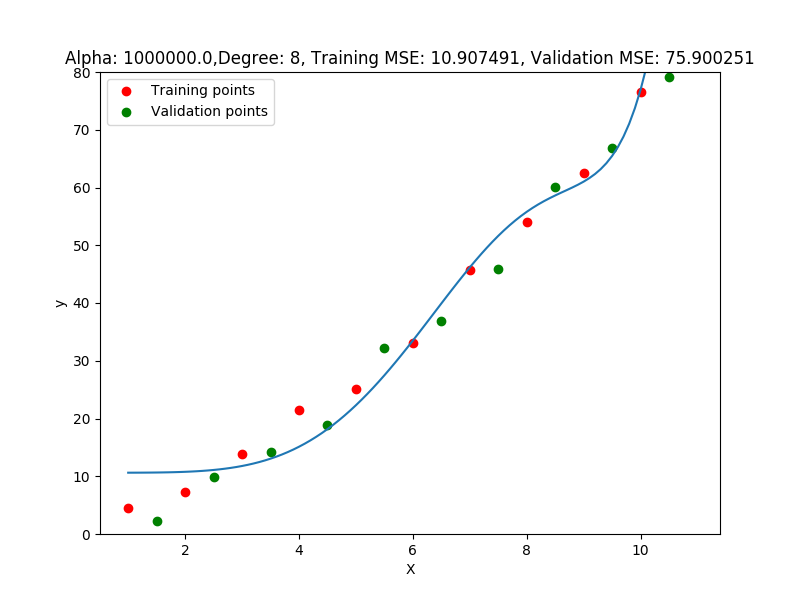

<IPython.core.display.Javascript object>


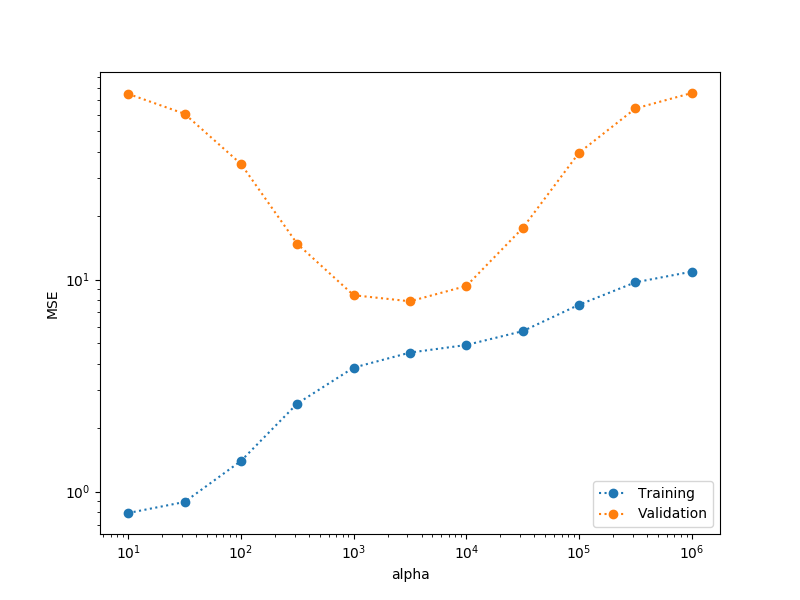

In [10]:
alphas =np.logspace(1,6,11)
fig = plt.figure(figsize=fig_size)
ax = fig.add_subplot(1,1,1)
plt.ion()
plt.show()
fig.canvas.draw()
train_mses=[]
val_mses=[]
for alpha in alphas:
    model_ridge = Ridge(alpha)
    ax.clear()
    model_ridge.fit(XN, y)
    predN = model_ridge.predict(xN)
    ax.plot(X, y, 'ro',label='Training points')
    ax.plot(XN_val[:,0],y_val,'go',label='Validation points')
    plt.legend()
    plt.title("Alpha: {},Degree: {}, Training MSE: {:4f}, Validation MSE: {:4f}".format(alpha,N,mean_squared_error(y,model_ridge.predict(XN)),mean_squared_error(y_val,model_ridge.predict(XN_val))))
    train_mses.append(mean_squared_error(y,model_ridge.predict(XN)))
    val_mses.append(mean_squared_error(y_val,model_ridge.predict(XN_val)))
    ax.plot(xN[:, 0], predN)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.pause(0.5)
    fig.canvas.draw()
plt.figure(figsize=fig_size)
plt.loglog(alphas,train_mses,'o:',label='Training')
plt.loglog(alphas,val_mses,'o:',label='Validation')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

# Ex2 Implementing Logistic Regression
In this first exercise we will be implementing a logistic regression algorithm. Be careful this is actually a **classification** algorithm.  

We are solving a binary classification task, this means that every point belongs to one of two classes either $1$ or $0$. 

In [11]:
####################################################################
# Make sure you run this cell but there is no need to read the code
####################################################################

def gen_data(typ="gauss",noise =0.4,seed=42):
    noise=0.4
    np.random.seed(seed)
    n_samples = 100
    data = np.ones((n_samples,3))
    if typ == "gauss":
        for i in range(n_samples):
            if i < n_samples/2:
                data[i,0] = np.random.randn() - 2
                data[i,1] = np.random.randn() - 2
                data[i,2] = 1
            else:
                data[i,0] = np.random.randn() + 2
                data[i,1] = np.random.randn() + 2
                data[i,2] = 0
    elif typ == "circle":
        radius = 5.
        for i in range(n_samples):
            if i < n_samples/2:
                r = radius*0.5*np.random.rand()
                angle = 2.*np.pi*np.random.rand()
                data[i,0] = r*np.sin(angle)+(np.random.rand()*2.*radius-radius)*noise
                data[i,1] = r*np.cos(angle)+(np.random.rand()*2.*radius-radius)*noise
                data[i,2] = 1
            else:
                r = radius*0.7+radius*0.3*np.random.rand()
                angle = 2.*np.pi*np.random.rand()
                data[i,0] = r*np.sin(angle)
                data[i,1] = r*np.cos(angle)
                data[i,2] = 0
    elif typ == "xor":
        for i in range(n_samples):
            data[i,0] = (np.random.rand()*10.-5)*noise
            data[i,1] = (np.random.rand()*10.-5)*noise
            data[i,2] = 1
        data[np.where(data[:,0]*data[:,1]<0),2] =0 
    elif typ == "spiral":
        n = int(n_samples/2)
        for i in range(n):
            r = i/n *5
            t = 1.75 *i/n*2*np.pi
            data[i,0] = r*np.sin(t) + (np.random.rand()*2 - 1)*noise
            data[i,1] = r*np.cos(t) + (np.random.rand()*2 - 1)*noise
            data[i,2] = 1

        for i in range(n):
            r = i/n *5
            t = 1.75 *i/n*2*np.pi + np.pi
            data[n+i,0] = r*np.sin(t) + (np.random.rand()*2 - 1)*noise
            data[n+i,1] = r*np.cos(t) + (np.random.rand()*2 - 1)*noise
            data[n+i,2] = 0

    np.random.shuffle(data)
    return data[:,0:2],data[:,2]

def new_fig_lr(X,y,data,model,transform):
    if transform is None:
        def transform(X):
            return X
    preds = model.predict(data)
        
    plt.figure(figsize=fig_size)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0')
    plt.legend()
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = transform(np.c_[xx1.ravel(), xx2.ravel()])
    probs = model.predict_prob(grid).reshape(xx1.shape)
    plt.contourf(xx1, xx2, probs, [0,0.5,1.], alpha=0.2,colors=['C1','b']);
    CS = plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
    labels = ['Decision boundary']
    for i in range(len(labels)):
        CS.collections[i].set_label(labels[i])
    plt.title("Training accuracy: {:4f}".format((preds == y).mean()))
    plt.legend()
    plt.show()

def new_fig_data_lr(X,y):
    plt.figure(figsize=fig_size)
    plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],label="Class 1")
    plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1], label="Class 0")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

Let's start with a simple dataset. Just be careful in this case $X$ is a $N\times 2$ matrix containing the coordinates of the points and $y$ is a $N$ dimensional vector with the corresponding labels. 

<IPython.core.display.Javascript object>


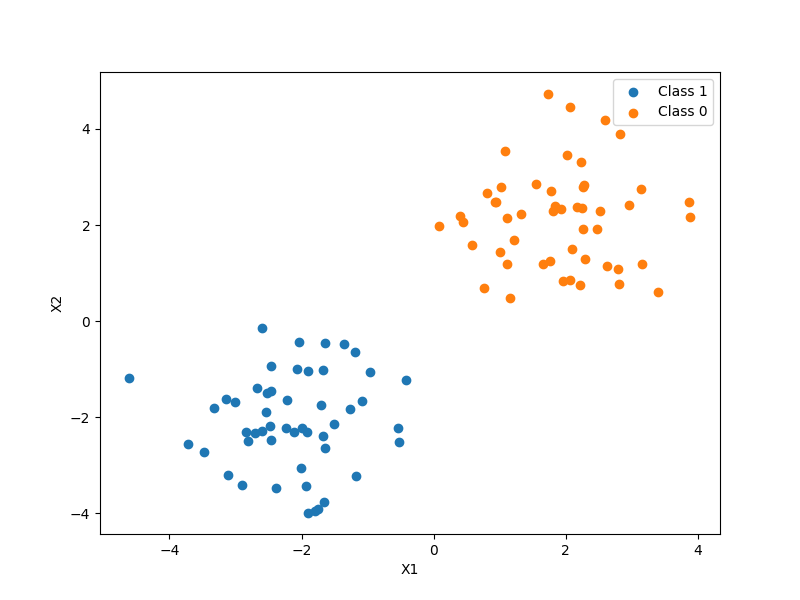

In [12]:
X,y = gen_data()
new_fig_data_lr(X,y)

**Reminder :** Similarly to the linear regression case we want to learn some function $f$ to make our predictions: 

$$y^{pred}:=f(X)$$ 

such that these predictions are close to the observed labels $y$.

Again very much like logistic regression we define a combination of the input features:
$$z(X):=w_1 X_1 + w_2 X_2+ b$$

What's different is that now the variable that we want to approach is binary, it either correponds to Class 1 or to Class 0.

Logistic regression models the probability of a point belonging to the default class. So to obtain a probability from $h(x)$ we just feed it through a function that project $h(x)$ back to the range $0$ to $1$.

This is the sigmoid function (or logistic function), this function is very important in ML so make sure you remember its definition:

$$\sigma(x):=\frac{1}{1+\exp(-x)}$$

<IPython.core.display.Javascript object>


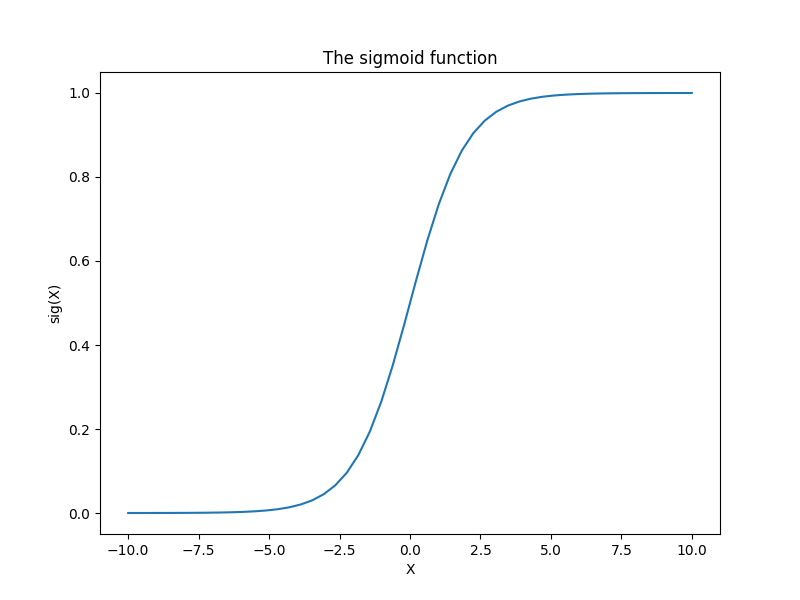

In [13]:
X_sig = np.linspace(-10,10)
y_sig = 1/(1+np.exp(-X_sig))
plt.figure(figsize=fig_size)
plt.plot(X_sig,y_sig)
plt.xlabel("X")
plt.ylabel("sig(X)")
plt.title('The sigmoid function')
plt.show()

So the definition of the predicted probability of the point belonging to the default class is: 

$$h(X_i):=\sigma(X_i\cdot w+ b)$$

with $w$ a vector of parameters (weights) and $b$ the intercept. Based on this predicted probability our predicted labels $y^{pred}$ are simply $y^{pred}=1$ if $h(X)>0.5$ and $y^{pred}=0$ otherwise. 

The goal is then exactly like for the linear regression case, we want to optimize these parameters so that our predictions fit the data that we have. The standard approach to do so is to define a loss function that determines the quality of our model and to use an optimization algorithm to find the parameters that minimize this loss function. The standard loss for a binary classification task is the cross-entropy loss (log loss), so the problem we are trying to solve is the following:

$$\hat{w} = \underset{w}{\operatorname{argmin}} \frac{1}{n}\sum_{i=1}^{n}\left[-y_i\log(h(X_i))-(1-y_i)\log(1-h(X_i))\right]$$

Try to look at what happens when $y_i=1$ and similary when $y_i=0$.

This can be reformulated in vector form as follows: 

$$\{\hat{w},\hat{b}\} = \underset{w,b}{\operatorname{argmin}} \frac{1}{n}-y^\top\log(h(X))-(1-y^\top)\log(1-h(X))$$

whith $h(X)=\sigma(X\cdot w + b \boldsymbol{1_n})$ where $\boldsymbol{1_n}$ is a n-dimensional vector of ones.

**Task 1:** Fill in the missing code in the following cell.

<IPython.core.display.Javascript object>


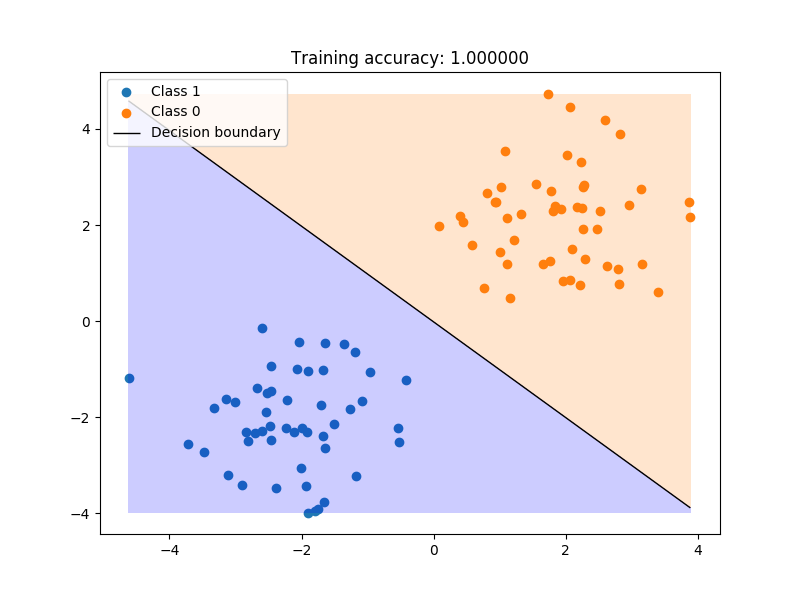

In [14]:
class LogisticRegression:
    def __init__(self, L=0.01, num_iter=1000):
        self.L = L
        self.num_iter = num_iter
           
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        
        # Weights initialization
        self.w = np.zeros(X.shape[1])
        self.b = 0.
        
        # Main gradient descent loop
        for i in range(self.num_iter):
            z = np.dot(X, self.w) + self.b
            h = self.sigmoid(z)
            gradient_w = np.dot(X.T, (h - y)) / y.size
            derivative_b = np.sum(h - y) / y.size
            self.w = self.w - self.L * gradient_w
            self.b = self.b - self.L * derivative_b
    
    def predict_prob(self, X):
        return (self.sigmoid(np.dot(X, self.w)+self.b))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    
model = LogisticRegression(L=0.01, num_iter=1000)
model.fit(X, y)

new_fig_lr(X,y,X,model,None)

<IPython.core.display.Javascript object>


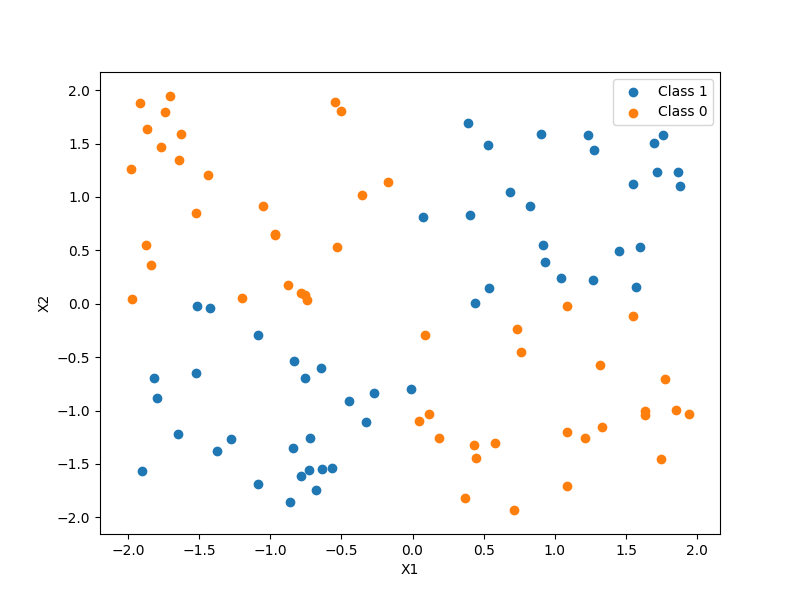

In [15]:
X,y = gen_data("xor")
new_fig_data_lr(X,y)

Let's try to fit our logistic regression model to this dataset.

<IPython.core.display.Javascript object>


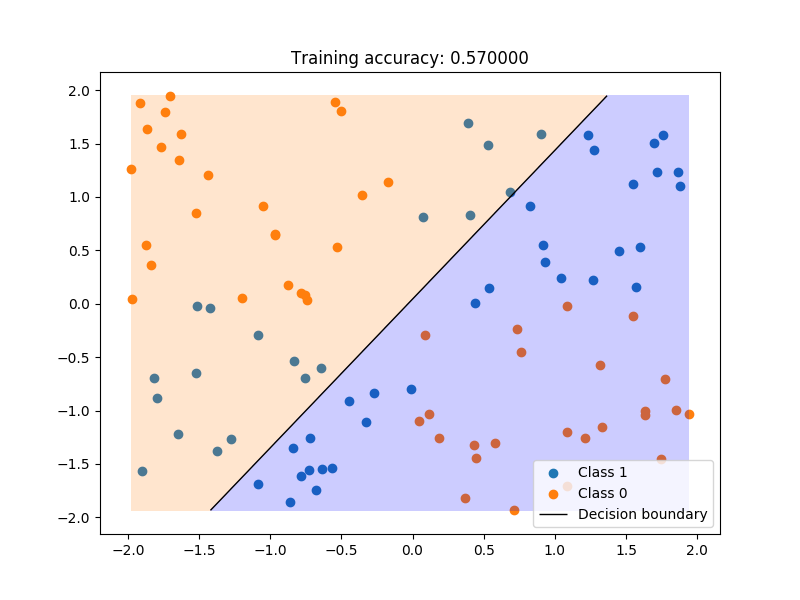

In [16]:
model = LogisticRegression(L=0.01, num_iter=1000)
model.fit(X, y)

new_fig_lr(X,y,X,model,None)

As you can clearly see the two classes are not linearly seperable. 

**Task 2:** Try to come up with a way to transform the data so that it becomes linearly separable. Make sure that your new transformed data is a $N\times C$ matrix, where $N$ is the number of datapoints and $C$ the number of features (ie:2 for the original data).

**Hint:** Try squaring the coordinates, using trigonometric functions, combining the two coordinates into a new one by adding or multiplying them. 

<IPython.core.display.Javascript object>


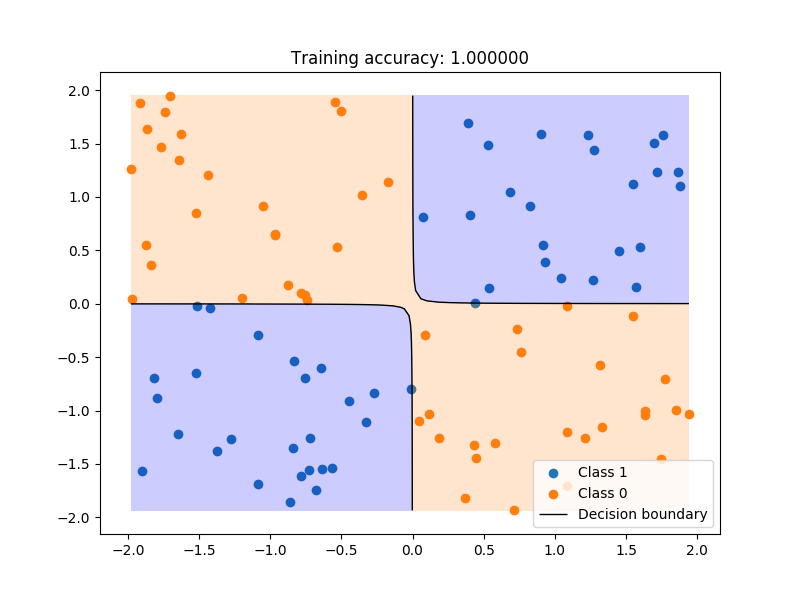

In [17]:
model = LogisticRegression(L=0.01, num_iter=1000)

def transform(X):
    return (X[:,0]*X[:,1]).reshape((X[:,0].size,1))

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)

**Bonus Task:** If you have time, you can play around with two other datasets. Just change the argument in the `gen_data` function to "spiral" or "circular".

<IPython.core.display.Javascript object>


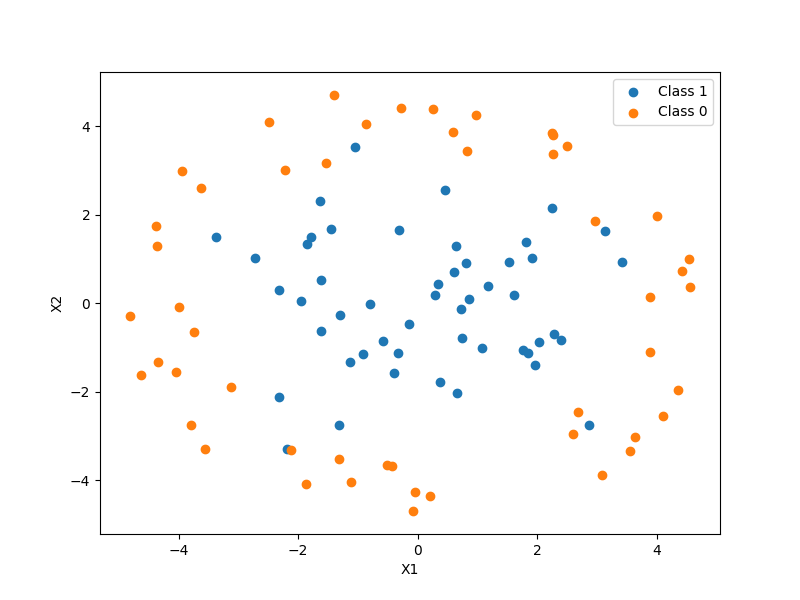

In [18]:
X, y = gen_data("circle")
new_fig_data_lr(X,y)

<IPython.core.display.Javascript object>


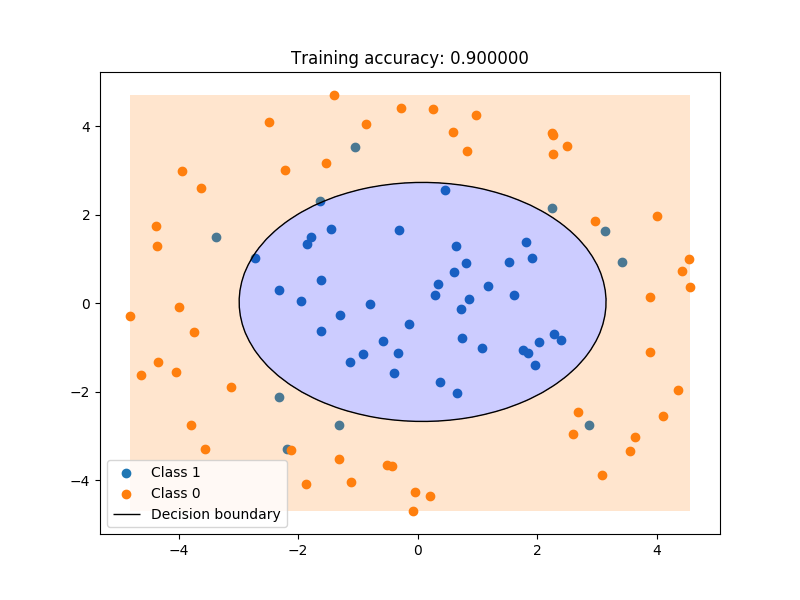

In [19]:
model = LogisticRegression(L=0.01, num_iter=1000)

def transform(X):
    return np.c_[X,X**2]

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)

<IPython.core.display.Javascript object>


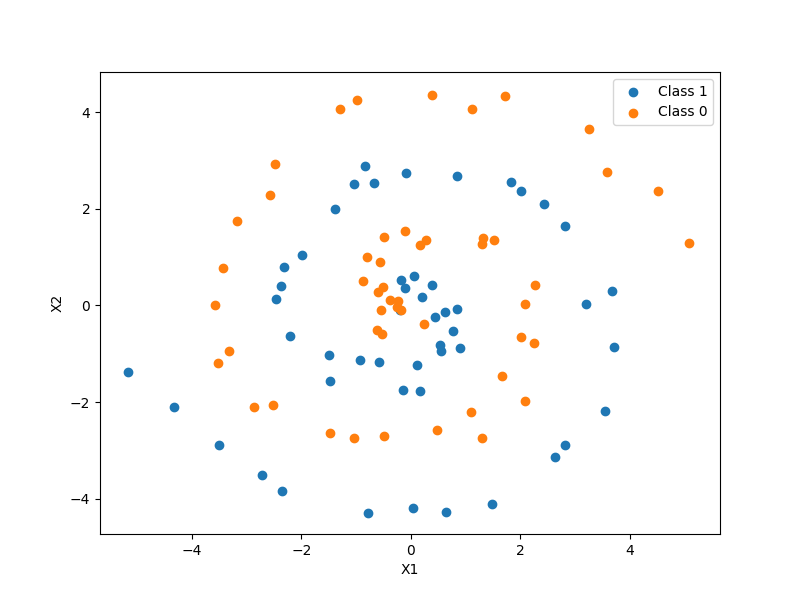

In [20]:
X,y = gen_data("spiral")
new_fig_data_lr(X,y)

<IPython.core.display.Javascript object>


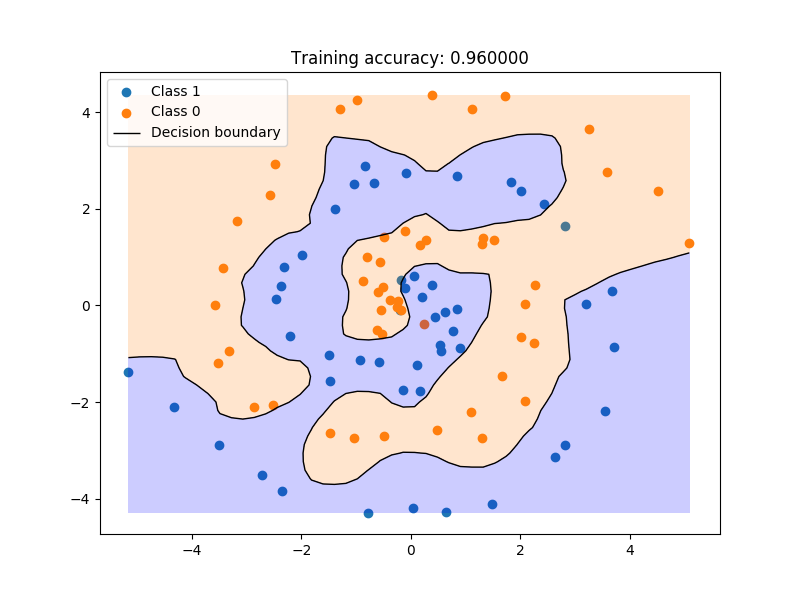

In [21]:
model = LogisticRegression(L=0.01, num_iter=10000)

def transform(X):
    np.random.seed(42)
    new_feature_ratio = 300
    K = np.random.randn(X.shape[1], X.shape[1]*new_feature_ratio)
    b = np.random.randn(X.shape[1]*new_feature_ratio)
    return np.maximum((np.matmul(X,K) + b),0) # This is basically a neural network with a random first layer

data = transform(X)
model.fit(data, y)

new_fig_lr(X,y,data,model,transform)

# Ex3 Solving a realistic task with sklearn

Feel free to skip these theoretical reminders if you feel confident with the content.

### Reminder: loss functions

Training and quality assessment of the model is carried out on independent sets of examples. As a rule, existing examples are divided into two subsets: training (train) and test (test). The choice of split ratio is a compromise. Indeed, the large size of the training leads to better algorithms, but more noise when evaluating the model on the test. Conversely, a large test sample size leads to a less noisy quality assessment, but the trained models are less accurate.

Many classification models predict a rating of membership to a positive class $ \tilde {y} (x) \in R $ (for example, the probability of being a class 1). After that, a decision is made on the class of the object by comparing the estimate with a certain threshold $ \ theta $:

$$y(x) = 
\begin{cases}
+1, &\text{if} \; \tilde{y}(x) \geq \theta \\
-1, &\text{if} \; \tilde{y}(x) < \theta
\end{cases}
$$

In this case, we can consider metrics that can work with the initial response of the classifier. In the assignment, we will work with the AUC-ROC metric, which in this case can be considered as the proportion of incorrectly ordered pairs of objects sorted by ascending the predicted grade 1 grade. A detailed understanding of how the AUC-ROC metrics work for this exercise is not required.

### Reminder: selection of hyperparameters of the model

In machine learning tasks, one should distinguish between model parameters and hyperparameters (structural parameters). Typically, model parameters are adjusted during training (for example, weights in a linear model or a decision tree structure), while hyper parameters are set in advance (for example, the value of the regularization force in a linear model or the maximum depth of a decision tree). Each model, as a rule, has a lot of hyperparameters and there are no universal sets of hyperparameters that work optimally in all tasks, so for each task you need to choose your own set.

To optimize the hyperparameters, models often use __search on the grid (grid search)__: for each hyperparameter, several values are selected, then all combinations of values are selected and a combination is selected on which the model shows the best quality (in terms of the metric being optimized). However, in this case, it is necessary to correctly evaluate the constructed model, namely, to do the partition into a training and test sample. There are several schemes for how this can be implemented:

 - Break the available sample into training and test. In this case, the comparison of a large number of models in the enumeration of hyperparameters leads to a situation where the best model on the test subsample does not retain its qualities on the new data. We can say that there is a _transition_ on a test sample.
 - To eliminate the problem described above, you can split the data into 3 non-overlapping subsamples: training, validation, and test. Validation subsample is used to compare models, and test - for the final quality assessment and comparison of families of models with selected hyperparameters.
 - Another way to compare models is [cross-validation](http://bit.ly/1CHXsNH). There are various cross-validation schemes:
  - Leave-One-Out
  - K-Fold
  - Repeated random sampling
  
Cross validation is computationally expensive, especially if you are iterating over a grid with a very large number of combinations. Given the finiteness of the time to perform the task, a number of compromises arise: 
  - the hyperparameter grid can be made more sparse by going through fewer values of each hyperparameter; however, you should not forget that in this case you can skip a good combination of hyperparameters;
  - cross-validation can be done with a smaller number of splits or folds, but in this case the quality assessment becomes more noisy and the risk of choosing a non-optimal set of hyperparameters increases due to randomness of splitting
  - hyperparameters can be optimized sequentially (greedily) - one by one, and not to go through all the combinations; such a strategy does not always lead to an optimal set;
  - sort through not all combinations of hyperparameters, but a small number of randomly selected ones.

### The task

In this exercise, we will learn to train machine learning models, correctly set up experiments, select hyperparameters, compare and mix models.

The goal to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.
 
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (11340 observations) contains both features and the Cover_Type.

### Data Fields
__Elevation__ - Elevation in meters  
__Aspect__ - Aspect in degrees azimuth  
__Slope__ - Slope in degrees  
__Horizontal_Distance_To_Hydrology__ - Horz Dist to nearest surface water features  
__Vertical_Distance_To_Hydrology__ - Vert Dist to nearest surface water features  
__Horizontal_Distance_To_Roadways__ - Horz Dist to nearest roadway  
__Hillshade_9am__ (0 to 255 index) - Hillshade index at 9am, summer solstice  
__Hillshade_Noon__ (0 to 255 index) - Hillshade index at noon, summer solstice  
__Hillshade_3pm__ (0 to 255 index) - Hillshade index at 3pm, summer solstice  
__Horizontal_Distance_To_Fire_Points__ - Horz Dist to nearest wildfire ignition points  
__Wilderness_Area__ - Wilderness area designation  
__Soil_Type__ - Soil Type designation  
__Cover_Type__ (7 types, integers 1 to 7) - Forest Cover Type designation  

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [22]:
# This is a very useful package for dealing with this sort of data
import pandas as pd

In [23]:
df = pd.read_csv('./forest_train.csv')
df.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,Cover_Type
0,0,2340,321,13,272,130,984,185,227,181,752,5,4,6
1,1,3003,315,16,67,0,3408,176,226,189,1126,22,3,1
2,2,2912,39,13,306,102,306,220,212,124,607,29,1,2
3,3,3292,285,29,999,194,3695,129,225,230,2356,27,3,1
4,4,2588,247,4,212,-8,300,212,242,168,6186,29,1,5


**Task 1:** Usually, after loading a dataset, some preprocessing is always necessary. In this case, it will be as follows:
 - Save the target variable (the one we want to predict) into a separate variable $y$
 - Save the explanatory variables into a separate variable $X$

In [24]:
df.columns

Index(['Unnamed: 0', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area', 'Cover_Type'],
      dtype='object')

In [25]:
y = np.array(df.Cover_Type)

#X = # Select only the columns that are not target here. Answer: df[df.columns[:-1]]
X = df[df.columns[:-1]]

X.head()

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,0,2340,321,13,272,130,984,185,227,181,752,5,4
1,1,3003,315,16,67,0,3408,176,226,189,1126,22,3
2,2,2912,39,13,306,102,306,220,212,124,607,29,1
3,3,3292,285,29,999,194,3695,129,225,230,2356,27,3
4,4,2588,247,4,212,-8,300,212,242,168,6186,29,1


 - In this part we will work on binary classification problem. That is why we will select only the examples with Cover Type 1 and 2. Next we will classify examples with Cover Type 1 vs examples with Cover Type 2.

In [26]:
X_bin = X[(y == 1) | (y == 2)]
y_bin = y[(y == 1) | (y == 2)]

 - Note that not all features are numeric. In the beginning we will work only with numeric features. Save them separately.

In [27]:
numeric_cols = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]
num_features = X_bin[numeric_cols] # Select only numeric features here
num_features.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
1,3003,315,16,67,0,3408,176,226,189,1126
2,2912,39,13,306,102,306,220,212,124,607
3,3292,285,29,999,194,3695,129,225,230,2356
7,3236,252,9,324,17,920,199,247,186,2310
13,3199,268,6,216,13,5918,204,243,178,1736


### Training classifiers on real features

In this section, it will be necessary to work only with real attributes and the target variable.

In the beginning we will look at how the selection of hyperparameters on the grid works and how the quality of the partitioning affects the quality. Now and further we will consider 4 algorithms:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

To begin with, the first three algorithms will choose one hyperparameter, which we will optimize:
  - kNN - number of neighbors (**n_neighbors**)
  - DecisonTree - tree depth (**max_depth**)
  - SGD Linear Classifier - optimized function (**loss**)
 
Leave the default values for the remaining hyperparameters. For the selection of hyperparameters, use the search on the grid, which is implemented in the class [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). As a cross-validation scheme, use 5-Fold CV, which can be set using the class [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).

![](https://i.stack.imgur.com/YWgro.gif)



**Task 2:** For each algorithm, select the optimal values of the specified hyperparameters, to do so select the values that should be tested in the grid search.

Then we build a graph of the average value of the quality of the cross-validation algorithm for a given value of the hyperparameter, which also display the confidence interval.

To obtain the value of quality on each fold, the average value of quality and other useful information, we use the field [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Which algorithm has the highest average quality?

Largest confidence interval?

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Insert value that should be checked during the grid search of optimal parameters
    
classifiers = {
    KNeighborsClassifier: [{'n_neighbors': np.arange(1, 15)}],
    DecisionTreeClassifier: [{'max_depth': np.arange(1, 15)}],
    SGDClassifier: [{'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']}]
}

trained_clfs = []

for classifier, params in classifiers.items():
    clf = GridSearchCV(classifier(), param_grid=params, cv=KFold(n_splits=5), return_train_score=True)
    clf.fit(num_features.values, y_bin)
    trained_clfs.append([clf, ])

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

<IPython.core.display.Javascript object>


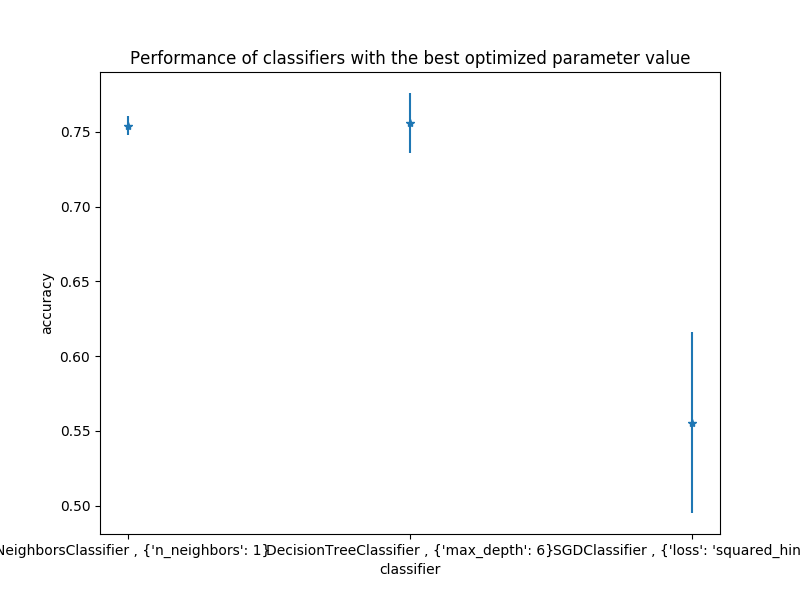

In [31]:
plt.figure(figsize=fig_size)
mean_values = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0] + ' , {}'.format(opt_params)
    stds.append(std)
    mean_values.append(mean)
    names.append(name)

plt.title('Performance of classifiers with the best optimized parameter value')
plt.errorbar(np.arange(len(mean_values)), mean_values, stds, linestyle='None', marker='*')
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.xticks(np.arange(len(mean_values)), names)
plt.show()

**Task 3:** Now let's select the number of trees (**n_estimators**) in the RandomForest algorithm. As you might know, in general, Random Forest is less likely to overfit with an increase in the number of trees. Pick the number of trees from which the quality on cross-validation stabilizes. Note that to conduct this experiment, it is not necessary to train many random forests with different numbers of trees from scratch: train one random forest with the maximum interesting number of trees, and then consider subsets of trees of different sizes consisting of trees of the constructed forest (field [**estimators_**](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). In further experiments, use the number of trees found.

Fill in the following code.

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
kf = KFold(n_splits=5)
clfs = []

for train_index, test_index in kf.split(num_features.values):
    X_train, X_test = num_features.values[train_index], num_features.values[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]
    
    clf = RandomForestClassifier(n_estimators=300)
    clf.fit(X_train, y_train)
    
    clfs.append([clf, X_test, y_test])

In [34]:
scores_by_fold = []

for clf_n_data in clfs:
    clf, x, y = clf_n_data
    predictions = []
    
    for estimator in clf.estimators_:
        predictions.append(estimator.predict(x))
        
    scores_by_fold.append([np.array(predictions), y - 1])

In [35]:
quality_by_num_trees = []
for num_trees in range(1, 301):
    quality = []
    
    for predictions, labels in scores_by_fold:
        vote = (predictions[:num_trees, :].mean(axis=0) > 0.5).astype(np.int64)
        quality.append((vote == labels).sum() / float(len(labels)))
        
    quality_by_num_trees.append(quality)

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


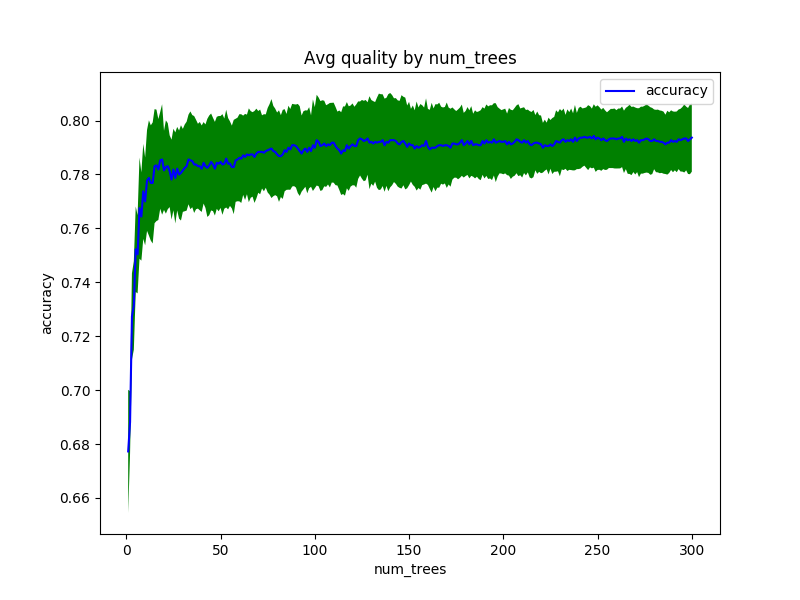

In [36]:
means = []
stds = []
xs = []
for i, num_trees in enumerate(range(1, 301)):
    means.append(np.mean(quality_by_num_trees[i]))
    stds.append(np.std(quality_by_num_trees[i]))
    xs.append(num_trees)
    
plt.figure(figsize=fig_size)
plt.plot(xs, means, 'b', label='accuracy')
plt.title('Avg quality by num_trees')
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.fill_between(xs, np.array(means) - np.array(stds), np.array(means) + np.array(stds), facecolor='green')
plt.show()

When learning algorithms, it is worth paying attention not only to their quality, but also how they deal with the data. In this problem, it turned out that some of the algorithms used are sensitive to the scale of features. To make sure that this could affect the quality, let's look at the meaning of the attributes themselves.

**Task 4:** Look at the values of the features **Aspect**, **Slope**, **Hillshade_9am**. How is the data distributed? Which of the considered algorithms can be affected by this? Can scaling of the features affect these algorithms?

<IPython.core.display.Javascript object>


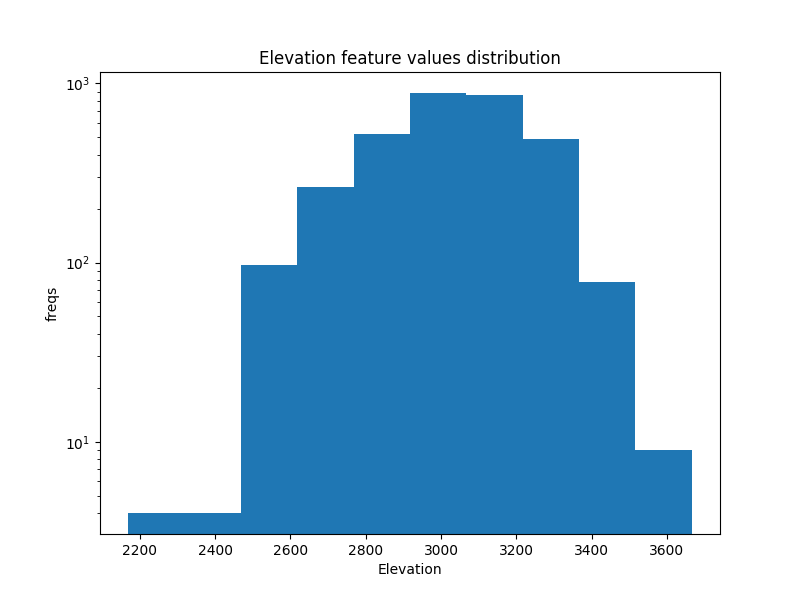

In [37]:
plt.figure(figsize=fig_size)
plt.hist(np.array(num_features.Elevation))
plt.yscale('log')
plt.ylabel('freqs')
plt.xlabel('Elevation')
plt.title('Elevation feature values distribution')
plt.show()

<IPython.core.display.Javascript object>


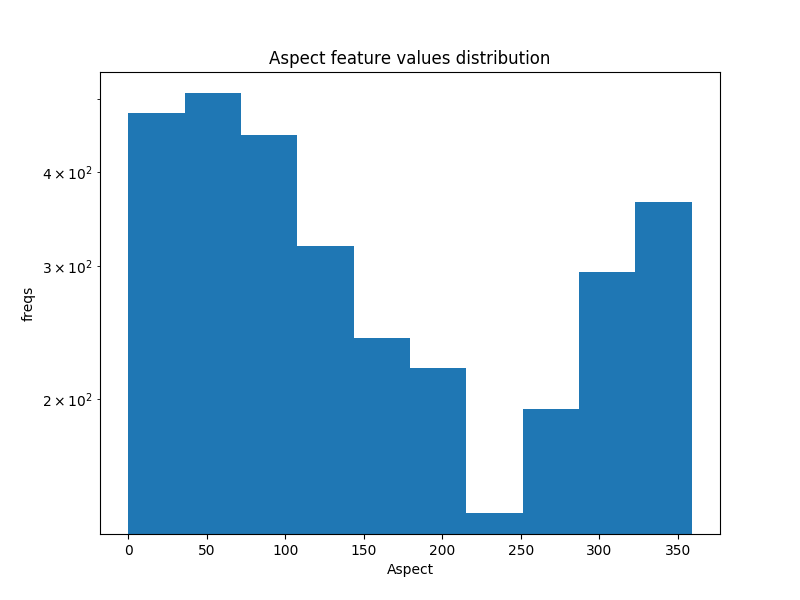

In [39]:
plt.figure(figsize=fig_size)
plt.hist(np.array(num_features.Aspect))
plt.yscale('log')
plt.ylabel('freqs')
plt.xlabel('Aspect')
plt.title('Aspect feature values distribution')
plt.show()

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


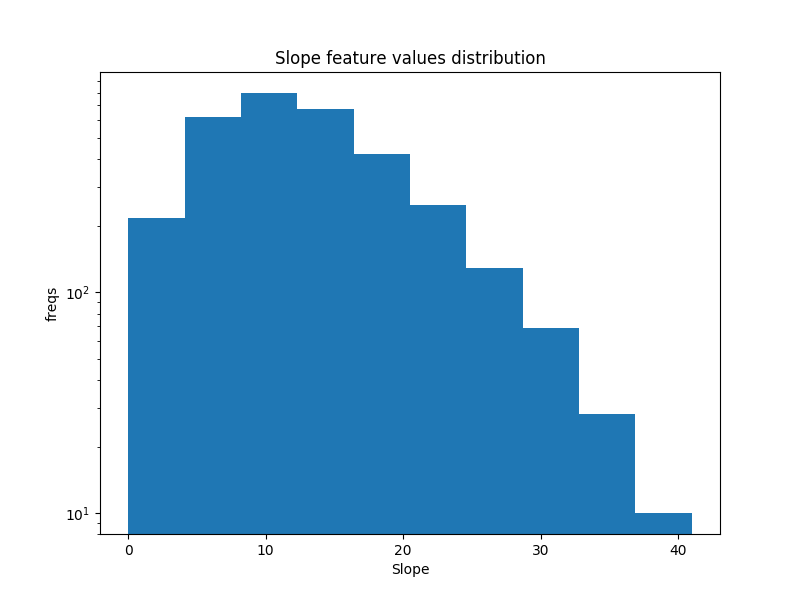

In [40]:
plt.figure(figsize=fig_size)
plt.hist(np.array(num_features.Slope))
plt.yscale('log')
plt.ylabel('freqs')
plt.xlabel('Slope')
plt.title('Slope feature values distribution')
plt.show()

<IPython.core.display.Javascript object>


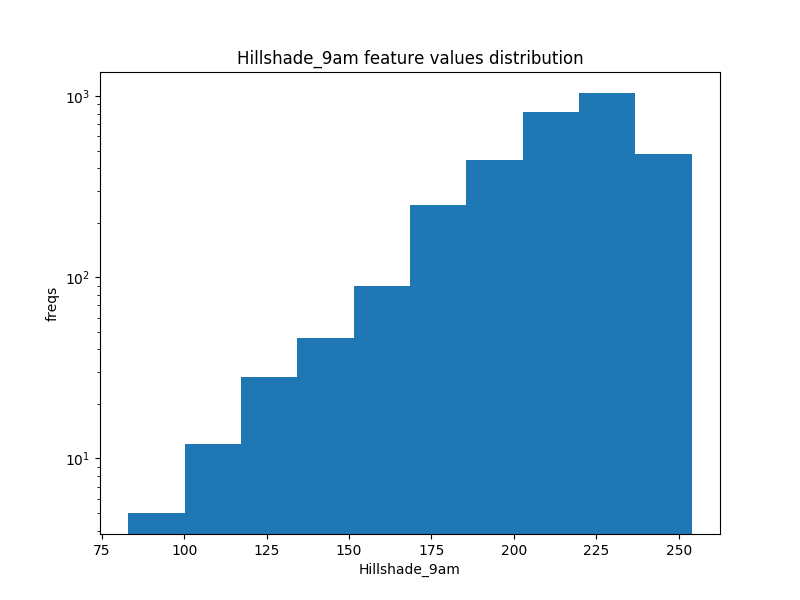

In [41]:
plt.figure(figsize=fig_size)
plt.hist(np.array(num_features.Hillshade_9am))
plt.yscale('log')
plt.ylabel('freqs')
plt.xlabel('Hillshade_9am')
plt.title('Hillshade_9am feature values distribution')
plt.show()

You can scale attributes, for example, in one of the following ways:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, where $\mu, \sigma$ — the mean and standard deviation of the characteristic value over the entire sample (see the function [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, where $[x_{min}, x_{max}]$ — minimum interval of characteristic values

Similar scaling schemes are given in classes [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) and [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**Task 5:** 

Scale all numerical attributes using the standard scaler and select the optimal values of the hyperparameters in the same way as above.

Has the quality of some algorithms changed and why?

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_features.values)

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
trained_clfs = []

for classifier, params in classifiers.items():
    clf = GridSearchCV(classifier(), param_grid=params, cv=KFold(n_splits=5), return_train_score=True)
    clf.fit(scaled_features, y_bin)
    trained_clfs.append([clf, ])

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


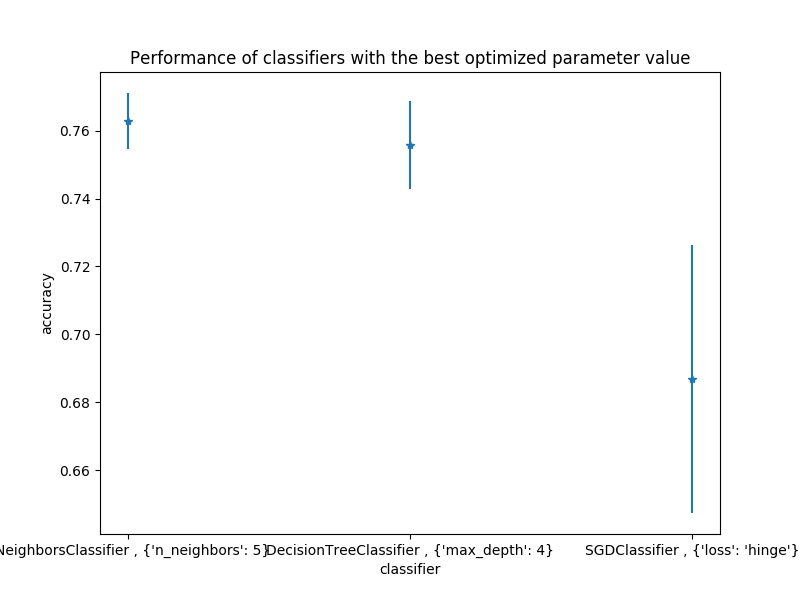

In [45]:
plt.figure(figsize=fig_size)
mean_values = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0] + ' , {}'.format(opt_params)
    stds.append(std)
    mean_values.append(mean)
    names.append(name)

plt.title('Performance of classifiers with the best optimized parameter value')
plt.errorbar(np.arange(len(mean_values)), mean_values, stds, linestyle='None', marker='*')
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.xticks(np.arange(len(mean_values)), names)
plt.show()

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


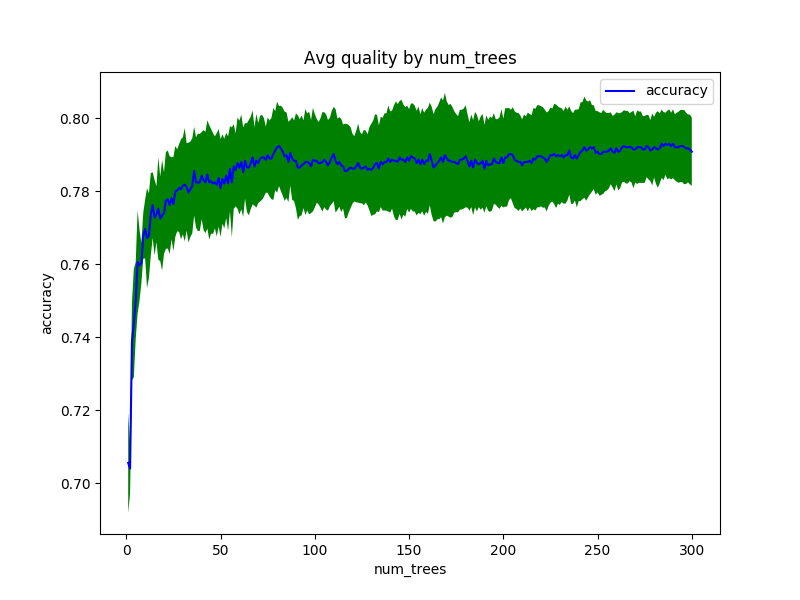

In [46]:
kf = KFold(n_splits=5)
clfs = []

for train_index, test_index in kf.split(num_features.values):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index]
    y_train, y_test = y_bin[train_index], y_bin[test_index]
    
    clf = RandomForestClassifier(n_estimators=300, max_features='sqrt', criterion='entropy')
    clf.fit(X_train, y_train)
    
    clfs.append([clf, X_test, y_test])
    
scores_by_fold = []

for clf_n_data in clfs:
    clf, x, y = clf_n_data
    predictions = []
    
    for estimator in clf.estimators_:
        predictions.append(estimator.predict(x))
        
    scores_by_fold.append([np.array(predictions), y - 1])
    
quality_by_num_trees = []
for num_trees in range(1, 301):
    quality = []
    
    for predictions, labels in scores_by_fold:
        vote = (predictions[:num_trees, :].mean(axis=0) > 0.5).astype(np.int64)
        quality.append((vote == labels).sum() / float(len(labels)))
        
    quality_by_num_trees.append(quality)
    
means = []
stds = []
xs = []
for i, num_trees in enumerate(range(1, 301)):
    means.append(np.mean(quality_by_num_trees[i]))
    stds.append(np.std(quality_by_num_trees[i]))
    xs.append(num_trees)
    
plt.figure(figsize=fig_size)
plt.plot(xs, means, 'b', label='accuracy')
plt.title('Avg quality by num_trees')
plt.xlabel('num_trees')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.fill_between(xs, np.array(means) - np.array(stds), np.array(means) + np.array(stds), facecolor='green')
plt.show()

**Task 6:** Now go through several hyperparameters across the grid and find the optimal combinations (best average quality value) for each algorithm in this case:
  - KNN - number of neighbors (*n_neighbors*) and metric (*metric*)
  - DecisonTree - tree depth (*max_depth*) and partitioning criterion (*criterion*)
  - RandomForest - the partitioning criterion in trees (*criterion*) and the maximum number of considered features (*max_features*); use the trees found earlier
  - SGDClassifier - optimized function (*loss*) and *penalty*
 
Please note that this operation can be resource intensive and time consuming. How to optimize the selection of parameters on the grid is described in the section "Selection of hyperparameters of the model".

Which algorithm has the best quality?

In [47]:
classifiers = {
    KNeighborsClassifier: [{'n_neighbors': np.arange(1, 15), 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}],
    DecisionTreeClassifier: [{'max_depth': np.arange(1, 15), 'criterion': ['gini', 'entropy']}],
    SGDClassifier: [{'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'], 'penalty': ['elasticnet', 'none', 'l1', 'l2', 'none']}],
    RandomForestClassifier: [{'criterion': ['gini', 'entropy'], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'n_estimators': [100]}]
}

trained_clfs = []

for classifier, params in classifiers.items():
    clf = GridSearchCV(classifier(), param_grid=params, cv=KFold(n_splits=5), return_train_score=True)
    clf.fit(scaled_features, y_bin)
    trained_clfs.append([clf, ])

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


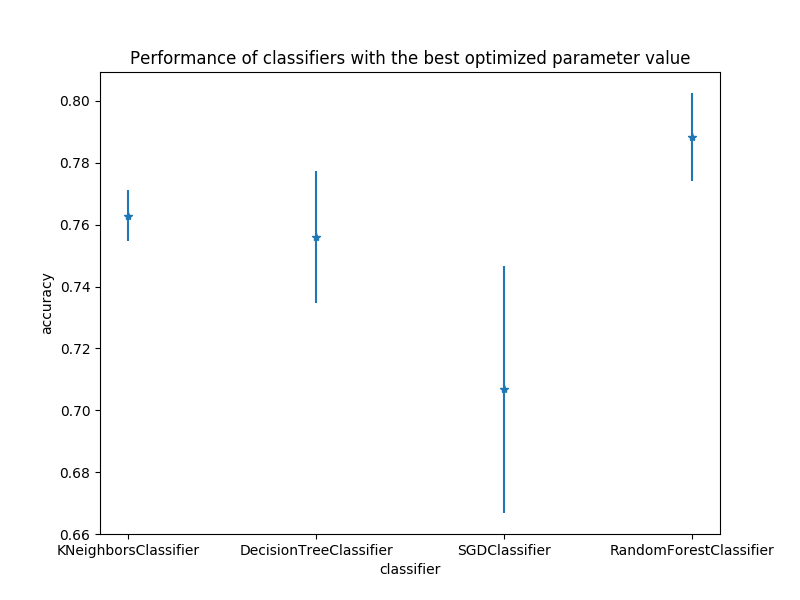

In [48]:
plt.figure(figsize=fig_size)
mean_values = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0]
    stds.append(std)
    mean_values.append(mean)
    names.append(name)

plt.title('Performance of classifiers with the best optimized parameter value')
plt.errorbar(np.arange(len(mean_values)), mean_values, stds, linestyle='None', marker='*')
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.xticks(np.arange(len(mean_values)), names)
plt.show()

**Task 7:** We will create [learning curves](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) for different algorithms, depicting the dependence of quality on test and training samples on the number of objects on which models are trained. Look at the behavior of the curves and answer the questions:
* Can the quality on the test sample decrease with an increase in the number of objects? And on the training? Why? 
* For what purposes can quality knowledge be used on the training part of the sample?
* Which algorithm is better trained on fewer objects?
* Can the addition of new objects significantly improve the quality of any of the algorithms or, with the existing data set for all algorithms, saturation occur?

In [49]:
from sklearn.model_selection import learning_curve

In [50]:
# Taken from here: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=fig_size)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

<IPython.core.display.Javascript object>


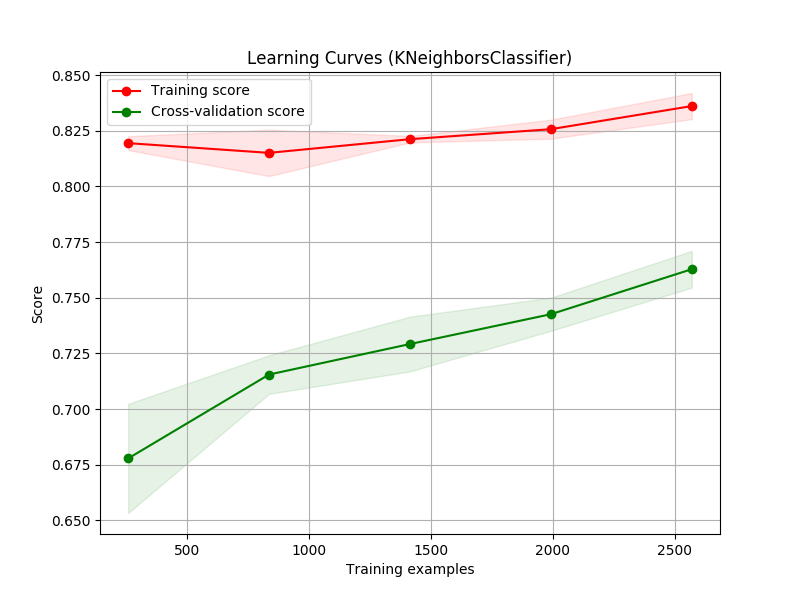

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


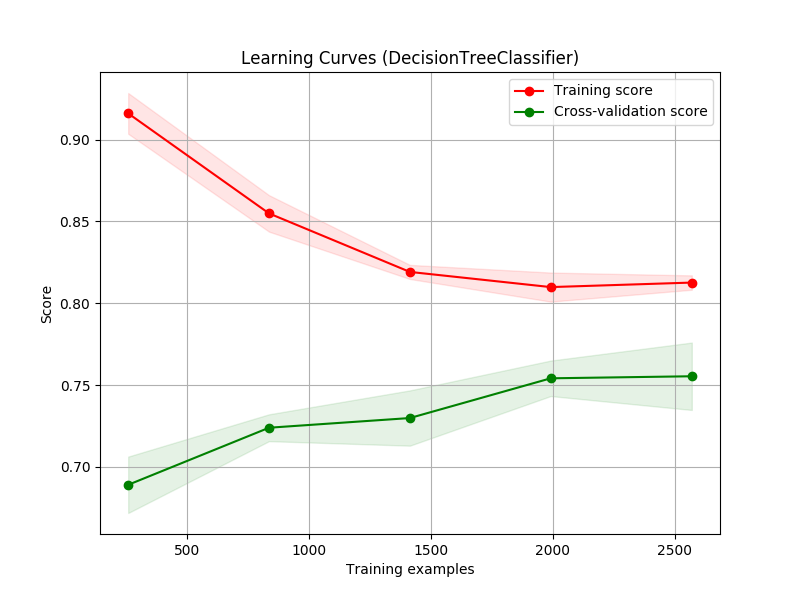

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


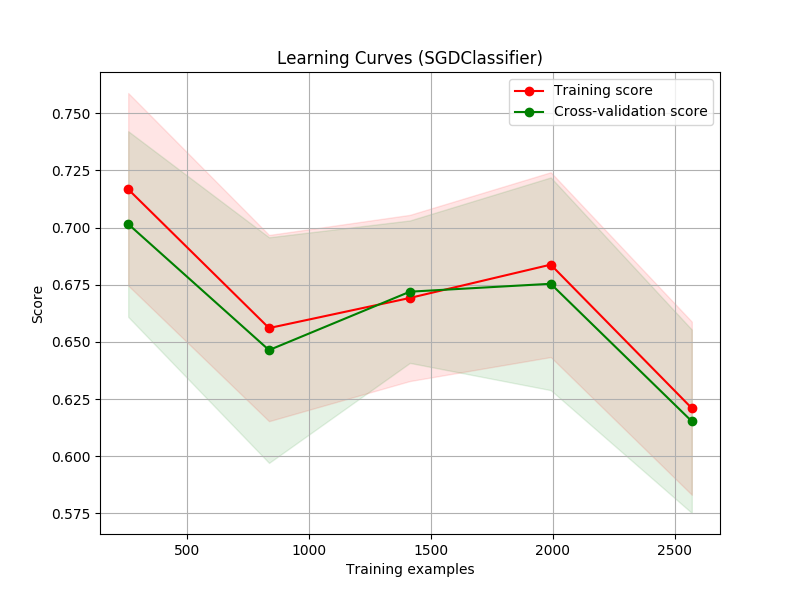

/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

<IPython.core.display.Javascript object>


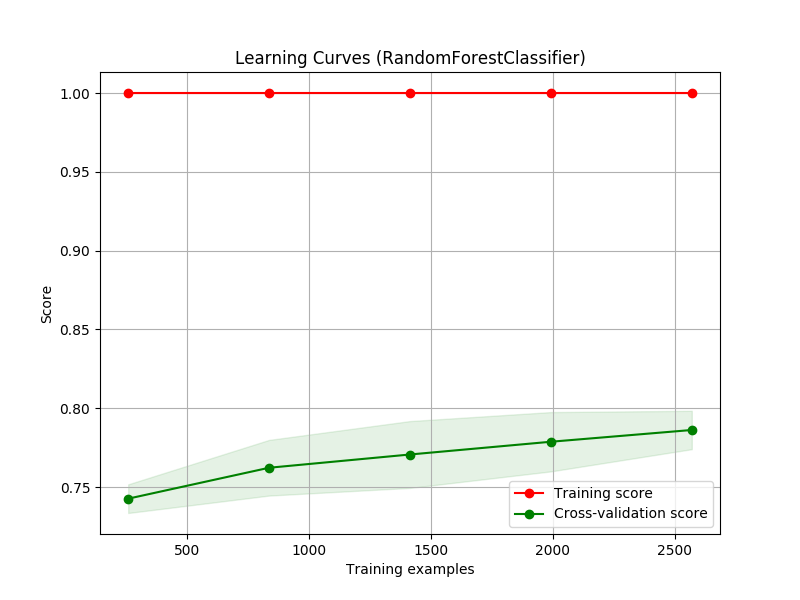

In [51]:
for clf in trained_clfs:
    name = clf[0].estimator.__str__().split('(')[0]
    plot_learning_curve(clf[0].best_estimator_, 'Learning Curves ({})'.format(name), scaled_features, y_bin, cv=KFold(n_splits=5))
    plt.show()

### Adding categorical features to models

So far we have not used non-numeric attributes that are in dataset. Let's see if we did the right thing and whether the quality of the models will increase after adding these attributes.

**Task 8:** Select all categorical features to be transformed using the one-hot-encoding method ([pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) or [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from sklearn).

In [56]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [57]:
X.columns

Index(['Unnamed: 0', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Soil_Type',
       'Wilderness_Area'],
      dtype='object')

In [58]:
cat_features = X_bin[['Soil_Type', 'Wilderness_Area']]
cat_features.head()

,Soil_Type,Wilderness_Area
1,22,3
2,29,1
3,27,3
7,32,3
13,22,1


In [59]:
enc = OneHotEncoder(categories='auto')
categorical_encoded_features = enc.fit_transform(cat_features).todense()

Since the features turned out to be quite numerous, in this work we will not re-select the optimal hyperparameters for models taking into account new signs (although it would be better to do it). 

We add the coded categorical to the scaled numerical features. 

**Task 9:** Train the algorithms with the best hyper-parameters found earlier. Did the addition of new features increase the quality? Measure quality as before using a 5-fold CV. For this it is convenient to use the function [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Is the best classifier now different than before?

In [60]:
all_features = np.hstack([X_bin, categorical_encoded_features])

In [61]:
 for clf in trained_clfs:
    name = clf[0].estimator.__str__().split('(')[0]
    print(name + ' : ' +\
          str(np.mean(cross_val_score(clf[0].best_estimator_, all_features, y_bin, cv=KFold(n_splits=5)))))

KNeighborsClassifier : 0.5801432149726505
DecisionTreeClassifier : 0.7569289206067741
SGDClassifier : 0.5073220834968484


/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/rdelutio/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

RandomForestClassifier : 0.7980102033400677


### Mixing models (blending)


In all the preceding paragraphs, we obtained many strong models that can be quite different in nature (for example, the method of the nearest neighbors and the random forest). Often in practice it is possible to increase the quality of prediction by mixing different models. Let's see if this approach really gives an increase in quality.

Choose from the constructed models of the two previous points two, which gave the highest quality on cross-validation (we denote them $ {clf}_1 $ and $ {clf}_2 $). Next, build a new classifier, whose answer on some object $ x $ will look like this:

$$result(x) = {clf}_1(x) * \alpha + {clf}_2(x) * (1 - \alpha)$$

where $ \alpha $ is a hyper-parameter of the new classifier.

**Task 10:**
When implementing models, it is good practice to create sklearn-compatible classes. First, such an implementation will have a standard interface and will allow other people to train the models you have implemented easily. Secondly, it is possible to use any sklearn package functionality that accepts a model as input, for example, the class **GridSearchCV**, **learning_curve** and others.

Create a classifier that is initialized with two arbitrary classifiers and the $ \ alpha $ parameter. During training, such a classifier should train both basic models, and at the stage of prediction, knead predictions of basic models according to the formula indicated above.

To create a custom classifier, you must inherit from the base classes:
*[BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html)* and implement methods*\_\_init\_\_, fit, predict and predict_proba*. Example sklearn-compatible classifier with comments can be found [here](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator) 

In [52]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [53]:
class BlendingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, clf1=None, clf2=None, alpha=None):
        self.clf1 = clf1
        self.clf2 = clf2
        self.alpha = alpha
    
    def fit(self, x, y):
        self.clf1.fit(x, y)
        self.clf2.fit(x, y)
    
    def predict(self, x):
        return (self.clf1.predict(x) * self.alpha + self.clf2.predict(x) * (1 - self.alpha)).astype(np.int64)
    
    def predict_proba(self, x):
        return self.clf1.predict_proba(x) * self.alpha + self.clf2.predict_proba(x) * (1 - self.alpha)

**Task 11:** Select the value $ \alpha $ for this classifier from the grid from 0 to 1. If the class is implemented correctly, then you can use *GridSearchCV*, as is the case with conventional classifiers.

Did this approach increase in quality compared to models that were trained separately? Explain why even simple blending of models can influence the final quality?

In [70]:
clf = GridSearchCV(BlendingClassifier(clf1=trained_clfs[1][0], clf2=trained_clfs[3][0]), param_grid=[{'alpha': np.linspace(0, 1, num=5)}], cv=KFold(n_splits=5), return_train_score=True)

In [ ]:
trained = clf.fit(all_features, y_bin)

In [ ]:
plt.figure(figsize=fig_size)
plt.plot(trained.cv_results_['param_alpha'].data.astype(np.float32), trained.cv_results_['mean_test_score'], 'b', label='accuracy')
plt.title('Mean folds accuracy')
plt.xlabel('x')
plt.xlabel('alpha')
plt.legend(loc="best")
plt.fill_between(trained.cv_results_['param_alpha'].data.astype(np.float32), trained.cv_results_['mean_test_score'] - trained.cv_results_['std_test_score'], trained.cv_results_['mean_test_score'] +  trained.cv_results_['std_test_score'], facecolor='green')
plt.show()

In [ ]:
trained_clfs.append([trained])

## Models comparison

After many models have been built, we have to compare them with each other. 

**Task 12:** Reflect back on what we did and draw conclusions about the classifiers in terms of how they dealt with the different features and the complexity of the model itself (what kind of hyperparameters the model has, whether changing the value of the hyperparameter greatly affects the quality of the model).

In [67]:
mean_values = []
splits = []
stds = []
names = []

for clf in trained_clfs:
    mean_vals = clf[0].cv_results_['mean_test_score']
    std_vals = clf[0].cv_results_['std_test_score']
    params = clf[0].cv_results_['params'][0]
    
    idx = np.argmin(clf[0].cv_results_['rank_test_score'])
    opt_params = clf[0].cv_results_['params'][idx]
    mean = clf[0].cv_results_['mean_test_score'][idx]
    std = clf[0].cv_results_['std_test_score'][idx]
    name = clf[0].estimator.__str__().split('(')[0]
    split = []
    for i in range(5):
        split.append(clf[0].cv_results_['split{}_test_score'.format(i)][idx])
    stds.append(std)
    mean_values.append(mean)
    names.append(name)
    splits.append(split)

/home/rdelutio/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


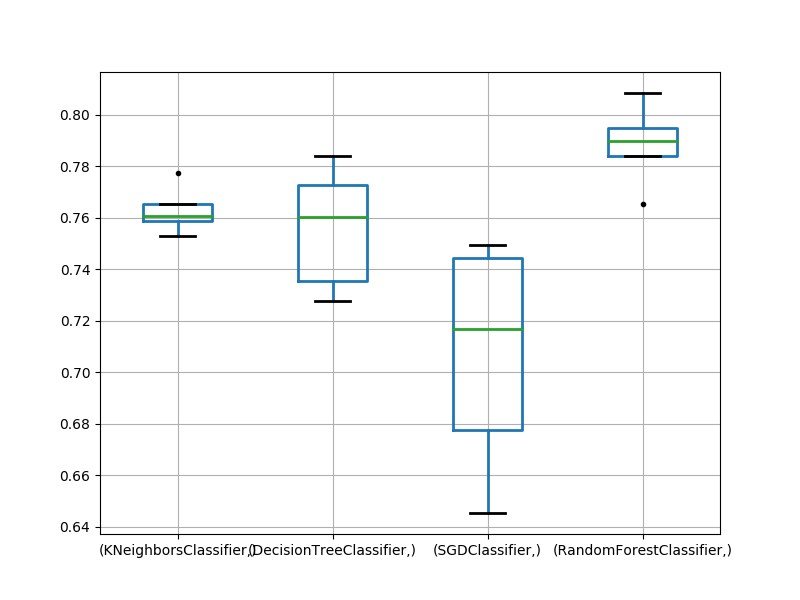

In [68]:
plt.figure(figsize=fig_size)
results_df = pd.DataFrame(data=np.asarray(splits).T, columns=[names])
ax = results_df.boxplot(figsize=(15, 8), return_type='axes', sym='k.')
_ = plt.setp(ax.lines, linewidth=2.0)
plt.show()

# Bonus task 
Try to find the best classifier (using the procedure above) on the full dataset with all cover types. 
You are free to create derived features from existing ones, experiment with different methods (classes of sklearn) and even to apply deep methods here.
You are not allowed to use additional data.
You are allowed to use publically available code.

You can send the results you have achieved in at [riccardo.delutio@geod.baug.ethz.ch], the best solution will receive a little present.